# Analisi metodo

Le simulazioni di Monte Carlo hanno numerose applicazioni nella gestione patrimoniale e nella pianificazione finanziaria. Qui studieremo un problema particolarmente adatto all'analisi di Monte Carlo se finiriai i soldi durante la pensione.

Nelle simulazioni Monte Carlo, vengono generati e analizzati scenari casuali. La maggior parte delle persone si concentra sulla casualità dei rendimenti di azioni e obbligazioni, ma le simulazioni Monte Carlo possono incorporare qualsiasi elemento casuale, come l'inflazione, le spese sanitarie, l'aspettativa di vita o persino le future aliquote fiscali.

Perché le simulazioni Monte Carlo sono necessarie, piuttosto che fare semplicemente proiezioni basate su risultati attesi? Ad esempio, se hai un mix 50-50 di azioni e obbligazioni e ti aspetti che il tuo portafoglio abbia rendimenti medi del 5% all’anno (diciamo 8% per le azioni e 2% per le obbligazioni), non potresti semplicemente proiettare come i tuoi risparmi dovrebbero evolversi nel tempo per capire se i tuoi soldi dureranno per tutta la pensione? 

Questo è chiamato una proiezione "lineare". 
Ci sono diversi problemi con questo approccio:

* **l'ordine dei rendimenti è importante**. Consideriamo il seguente semplice esempio, mostrato nelle  Supponiamo che un investitore inizi con 100€ e, nel primo anno, i suoi investimenti vadano molto bene e raddoppino, mentre nel secondo anno vadano male e si dimezzino. Come mostra la tabella, finisce con gli stessi 100€, e non fa differenza se l'ordine dei rendimenti è invertito. Ma ora supponiamo che l'investitore debba prelevare 50€ alla fine del primo anno per le spese. Come mostra la Tabella, l'ordine conta. Anche se i rendimenti attesi sono gli stessi indipendentemente dall'ordine dei rendimenti, il risultato è diverso, cosa che può essere catturata in una simulazione Monte Carlo.


Rendimenti senza prelievo

|                                    | Capitale iniziale | Capitale a fine primo anno | Capitale a fine secondo anno |
|------------------------------------|-------------------|----------------------------|------------------------------|
| rendimento 100% seguito da un -50% | 100€              | 200€                       | 100€                         |
| rendimento -50% seguito da un 100% | 100€              | 50€                        | 100€                         |

Rendimenti con prelievo di 50€

|                                    | Capitale iniziale | Capitale a fine primo anno | Capitale a fine secondo anno |
|------------------------------------|-------------------|----------------------------|------------------------------|
| rendimento 100% seguito da un -50% | 100€              | 200€ - 50€ = 150€          | 75€                          |
| rendimento -50% seguito da un 100% | 100€              | 50€ - 50€                  | 0€                           |


* **Le simulazioni possono fornire una distribuzione di probabilità degli esiti.** La risposta alla domanda su quanti anni dureranno i tuoi soldi in pensione non è un numero singolo, ma piuttosto una distribuzione di probabilità. Esistono certamente delle regole pratiche che cercano di semplificare la risposta a un singolo numero. La famosa "regola del 4%" suggerisce che se spendi il 4% dei tuoi risparmi per la pensione e lo aggiusti per l'inflazione ogni anno, i tuoi risparmi dureranno comodamente per 30 anni. Lavorando a ritroso, se ti aspetti di spendere 5.000€ al mese, o 60000€ all'anno, avresti bisogno di 25 volte (=1.0/0.04) quella somma, ovvero 1,5 milioni€ di risparmi per la pensione per garantire in sicurezza che i tuoi soldi dureranno. Ma la probabilità è davvero del 100%? E cosa succede se hai solo 1,2 milioni€ di risparmi, quindi sei costretto a spendere il 5% dei tuoi risparmi anziché il 4%? Le simulazioni Monte Carlo possono rispondere a domande che coinvolgono probabilità.

* **Le simulazioni possono gestire situazioni più complesse.** Le simulazioni Monte Carlo sono spesso utilizzate, non solo in Finanza ma anche in altri campi come la Fisica, quando non esistono "soluzioni in forma chiusa" o formule matematiche per risolvere un problema. Aggiungere complicazioni a qualsiasi problema può infatti renderlo impossibile da risolvere analiticamente. In questo capitolo discuteremo alcune di queste complicazioni del mondo reale, come le tabelle di mortalità, le molteplici fonti di casualità come il rischio di inflazione e i rendimenti del mercato azionario con long tails.

## Simulazione dei rendimenti in python

Di gran lunga, il modo più comune per modellare i prezzi delle azioni è assumere che seguano una distribuzione lognormale piuttosto che una distribuzione normale. Una distribuzione normale si verificherebbe se sommassi variazioni di prezzo casuali e identicamente distribuite, mentre una distribuzione lognormale si verificherebbe (approssimativamente) se moltiplicassi rendimenti casuali e identicamente distribuiti. Vedremo presto perché utilizzare una distribuzione lognormale è molto più sensato per modellare i prezzi delle azioni.

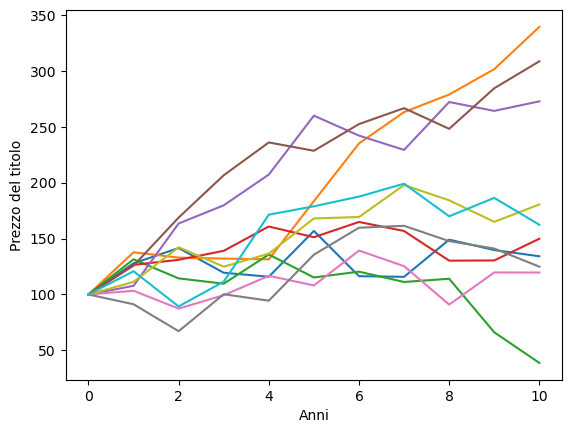

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
np.random.seed(123)
 
num_years = 10
num_sims = 10000
mean = 8
stdev = 20
 
z = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
 
P = np.zeros((num_sims, num_years+1))
P[:,0] = 100
 
for sim in range(num_sims):
    for year in range(1, num_years+1):
        P[sim, year] = P[sim, year-1] + z[sim, year]
 
plt.xlabel('Anni')
plt.ylabel('Prezzo del titolo')
plt.plot(P[0:10,:].T);

possiamo analizzare la distribuzione dei valori finali del prezzo delle azioni

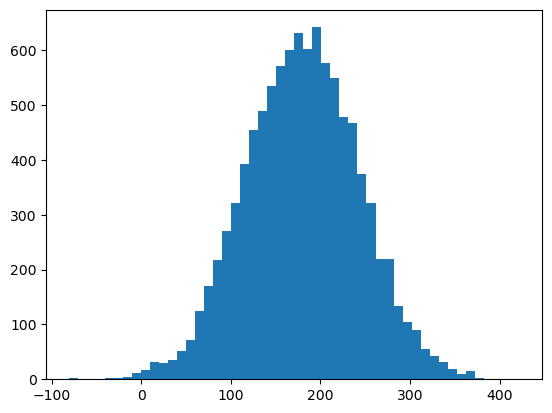

In [2]:
plt.hist(P[:,-1], bins=50);

Ci sono due problemi con la distribuzione normale per i prezzi delle azioni:

* Come mostra l'istogramma, c'è una piccola probabilità che i prezzi delle azioni possano diventare negativi.
* Il rendimento percentuale e la volatilità cambiano con il livello dei prezzi delle azioni. In altre parole, quando l'azione parte da 100€, ci aspettiamo un apprezzamento annuale di 8€, ovvero un rendimento dell'8%, ma se l'azione sale a 200€, secondo il modello normale, ci aspettiamo ancora un apprezzamento annuale di 8€, ma ora è solo un rendimento del 4%. Non c'è motivo di pensare che i rendimenti debbano variare in questo modo con il prezzo delle azioni.

Pertanto, consideriamo le distribuzioni lognormali.

In [3]:
final = P[:,-1]
negative = final < 0
negative = final[negative]
(len(negative) / len(final)) * 100

0.24

La Figura sotto mostra i primi quattro percorsi campione quando i prezzi delle azioni seguono una distribuzione lognormale,e qui sotto il codice che ha generato il grafico. 

Poiché il numero di seme che abbiamo utilizzato è lo stesso che abbiamo usato per generare il grafico sopra, i percorsi sembrano simili ma non identici.

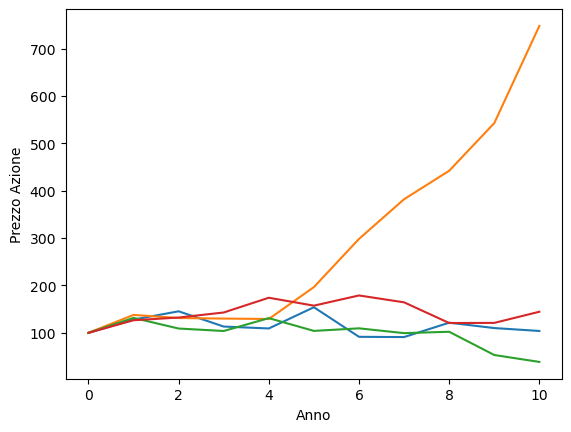

In [4]:
np.random.seed(123)
 
num_years = 10
num_sims = 10000
mean = 0.08
stdev = 0.20 
 
ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
 
P = np.zeros((num_sims, num_years+1))
P[:,0] = 100
 
for sim in range(num_sims):
    for year in range(1, num_years+1):
        P[sim, year] = P[sim, year-1]* (1 + ret[sim, year])
 
plt.xlabel('Anno')
plt.ylabel('Prezzo Azione')
plt.plot(P[0:4,:].T);

Qui sotto, tracciamo un istogramma dei prezzi finali delle azioni su 10.000 simulazioni, che ora ha la forma di una distribuzione lognormale, utilizzando lo stesso comando di prima (eccetto che ritagliamo l'intervallo nell'istogramma perché ci sono alcuni valori anomali con la distribuzione lognormale):

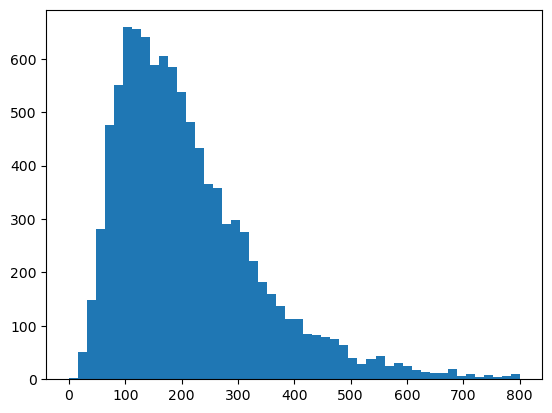

In [5]:
plt.hist(P[:,-1], bins=50, range=(0,800));

## Media Geometrica e Media aritmetica

Nella simulazione sopra, abbiamo assunto che il rendimento medio annuo fosse dell'8%. Ma sarebbe un errore assumere che il valore atteso di un investimento di 100€ in 20 anni sarebbe 100€ x 1.08^20. Questo è un esempio del concetto, che viene trattato più volte in questo capitolo, che il valore atteso di una funzione ƒ(x̃) di una variabile casuale x̃ non è generalmente uguale alla funzione valutata al valore atteso di x̃ (a meno che la funzione non sia lineare):

$$
        E \left[f(\tilde{x})\right] \neq f\left(E \left[\tilde{x}\right]\right) 
$$


Per essere più specifici, definiamo la differenza tra la media aritmetica e la media geometrica di una serie di rendimenti. Supponiamo che i rendimenti su N periodi siano $r_1$, $r_2$, $\cdots$ , $r_N$. Un portafoglio che inizia con $S_0$ avrà un valore di $S_N$ dopo N periodi, dove:

$$
    S_N = S_0 \left(1 + r_1 \right) \left(1 + r_2 \right) \cdots \left(1 + r_N \right)
$$

Il rendimento medio geometrico, G, è il tasso di crescita medio che darebbe lo stesso valore finale del portafoglio, SN, se tutti i rendimenti fossero identici in ogni periodo:

$$
    S_N = S_0 \left(1 + G \right)^N
$$

Per ottenere la media geometrica G la formula diventa:

$$
    G = \left( \frac{S_N}{S_0} \right)^{\frac{1}{N}} -1
$$

La media aritmetica invece si ottiene con 

$$
A = \frac{r_1 +r_2 + \cdots + r_N}{N} = \frac{1}{N} \sum_{i = 1}^{N} r_i
$$

La media aritmetica, A, sarà sempre maggiore della media geometrica, G, e un'approssimazione per la differenza è

$$
 G = A - \frac{1}{2} \sigma^2 
$$


## Rendimenti Semplici vs. Rendimenti Composti Continui

La capitalizzazione è una complicazione e una considerazione aggiuntiva da tenere a mente quando si simulano i rendimenti.
Prima discuteremo la differenza tra tassi di interesse semplici e composti continuamente, e poi definiremo i rendimenti composti continuamente.

La seguente tabella illustra gli effetti della capitalizzazione utilizzando un tasso di interesse annuo semplice del 6%. 
Il tasso annuo effettivo, che è definito come l'aumento percentuale dei fondi investiti su un orizzonte di un anno, è superiore al tasso di interesse semplice. 
Man mano che la frequenza di capitalizzazione tende all'infinito, otteniamo la capitalizzazione continua, e si può dimostrare che un tasso annuo semplice del 6% capitalizzato continuamente si avvicina a un tasso annuo effettivo di $e^0.06$ = 6.18%.

|                            | Formula                                                                  | Tasso annuale effettivo |
|----------------------------|--------------------------------------------------------------------------|-------------------------|
| Capitalizzazione annuale   | 1 + 0.06 = 1.06                                                          | 6.00%                   |
| Capitalizzazione semetrale | [1 + (0.06÷2)]^2 = 1.0609                                                | 6.09%                   |
| Capitalizzazione mensile   | [1 + (0.06÷12)]^12 = 1.0617                                              | 6.17%                   |
| Capitalizzazione continua  | $$ \lim_{n \to \infty} \left( 1 + \frac{0.06}{m} \right) ^ m = e^0.06 $$ | 6.18%                   |



Un tasso semplice che è capitalizzato continuamente è chiamato tasso composto continuamente. In generale, la relazione tra il tasso annuo effettivo (EAR) e il tasso composto continuamente (cc) è

$$
    e^{r_{cc}} = 1 + r_{EAR}
$$

Dunque 

$$
    r_{cc} = ln(1 + r_{EAR})
$$

Allo stesso modo in cui abbiamo calcolato i tassi di interesse composti continuamente, possiamo anche definire i rendimenti composti continuamente, r, a partire dai rendimenti semplici, R:

$$
    r = ln(1 + R) = ln\left( \frac{P_t}{P_{t-1}} \right) = ln(P_t) - ln(P_{t-1})
$$

Nella tabella qui sotto, confrontiamo i rendimenti semplici con i rendimenti composti continuamente quando un'azione passa da 100€ a 200€ e poi torna a 100€. Come mostra la tabella, i rendimenti composti continuamente su più periodi sono più semplici da gestire: sono solo la somma dei rendimenti di singolo periodo. Tuttavia, i rendimenti del portafoglio sono più complicati: i rendimenti medi di un portafoglio 60-40 di azioni e obbligazioni non sono semplicemente la media dei rendimenti composti continuamente.

|          | t=0  | t=1             | t=2              | t=0,t=2                   |
|----------|------|-----------------|------------------|---------------------------|
| prezzo   | 100€ | 200€            | 100€             |                           |
| ritorno  |      | 100%            | -50%             | (1+r_1)(1+r_2) - 1 = 0    |
| continuo |      | ln(P1/P0) = 63% | ln(P2/P1) = -63% |   r_1 + r_2 = 0           |

## Moto Browniano Geometrico

Saremmo negligenti se non menzionassimo un altro modello per i prezzi delle azioni che è comunemente usato in finanza e particolarmente nella letteratura sulla valutazione delle opzioni. Secondo questo modello, i prezzi delle azioni seguono un processo di Moto Browniano Geometrico (GBM) descritto dall'equazione differenziale.

$$
\frac{dS}{S} = \mu dt + \sigma dz
$$

che porta all’equazione per l’evoluzione dei prezzi delle azioni

$$
    S_{t + \Delta t} = S_t exp\left((\mu - 1/2 \sigma^2) \Delta t + \sigma \sqrt{\Delta t} z \right)
$$

con:

* $S_t$ prezzo della azione al tempo t
* $\mu$ rendimento atteso annuale istantaneo
* $\sigma$ volatilita instantanea annuale
* $\Delta t$ cambiamento del tempo
* z variabile causuale normale 

Quindi, proprio come il nostro modello precedente, i prezzi delle azioni hanno una distribuzione lognormale e i rendimenti composti continui hanno una distribuzione normale.

$$
    ln\left(\frac{S_{t + \Delta t}}{S_t}\right) \approx N \left( (\mu - \frac{1}{2} \sigma^2) \Delta t,  \sigma \sqrt{\Delta t} \right)
$$


Questo modello è simile al modello che abbiamo introdotto all'inizio del capitolo, tranne per il fatto che stiamo generando rendimenti composti continuamente casuali nel modello GBM e stavamo generando rendimenti semplici casuali all'inizio del capitolo. 

La cosa importante da tenere a mente, qualunque modello venga utilizzato, è che i modelli dovrebbero essere calibrati in modo coerente. Ad esempio, per il modello di moto browniano geometrico, se si stima la volatilità basandosi sui rendimenti storici, si dovrebbero usare rendimenti composti continuamente piuttosto che rendimenti semplici.

## Stimare le probabilità di successo

Ora che le premesse sono state chiarite, siamo pronti a utilizzare le simulazioni per rispondere ad alcune domande di pianificazione finanziaria.

Come abbiamo menzionato all'inizio del capitolo, una comune applicazione delle simulazioni Monte Carlo è stimare la probabilità che un investitore esaurisca i soldi durante la pensione. 

Inizieremo con un caso semplice e poi aggiungeremo diversi dettagli.

Nel caso base semplice, assumiamo che un pensionato senza reddito e con risparmi di 1.200.000 € spenda inizialmente 60.000€/anno (5% dei suoi risparmi) al netto di qualsiasi reddito come la pensione sociale. 

Assumiamo che la spesa netta cresca a un tasso di inflazione del 2%/anno. Ignoriamo eventuali tasse che potrebbero essere applicate quando si prelevano i risparmi. 

Per semplificare le cose, eseguiremo la simulazione su base annuale anziché mensile, e tutte le spese avvengono all'inizio dell'anno. 
Assumiamo che il rendimento medio combinato di azioni e obbligazioni dell'investitore sia del 6% e una deviazione standard del 12% ogni anno per l'intero periodo di pensionamento. 

Essenzialmente, stiamo assumendo non solo che i rendimenti attesi non cambino nel tempo, ma che la composizione di azioni e obbligazioni non cambi nel tempo e che i portafogli vengano riequilibrati una volta all'anno. 

Rilasseremo molte di queste ipotesi più avanti in questo capitolo e in altri capitoli.


Il codice Python qui sotto crea un array bidimensionale del patrimonio che traccia il percorso nel tempo per ogni simulazione, che chiamiamo W. 

Ogni riga rappresenta una simulazione diversa e ogni colonna rappresenta un anno diverso della simulazione, partendo dalla ricchezza iniziale all'anno 0.

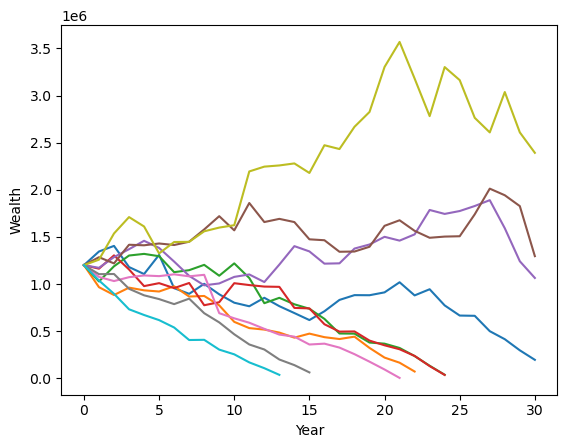

In [6]:
np.random.seed(123)

num_years = 30
num_sims = 10000

mean = 0.06
stdev = 0.12

spending_0 = 60000
W0 = 1200000
 
inflation = 0.02
 
ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
 
W = np.empty(shape=[num_sims, num_years+1])
W[:,:] = np.NaN
W[:,0] = W0
 
count_bankrupt = 0
 
for sim in range(num_sims):
    spending = spending_0
    for year in range(1, num_years+1):
        # Check whether you run out of money
        next_period_wealth = (W[sim, year-1] - spending) * (1 + ret[sim, year])
        if next_period_wealth < 0:
            count_bankrupt += 1
            break
        else:
            W[sim, year] = next_period_wealth
        spending = spending * (1 + inflation)
 
plt.xlabel('Year')
plt.ylabel('Wealth')
plt.plot(W[0:10,:].T);

In [7]:
print("The probability of bankruptcy is ", count_bankrupt/num_sims)

The probability of bankruptcy is  0.4809


La probabilità di bancarotta è vicina al 50%, il che è piuttosto alto. Ma nella prossima sezione, esamineremo un piano di spesa che riduce le spese quando i beni diminuiscono.


## Strategia dinamica

L'ultima simulazione era una strategia statica in cui la spesa (così come l'allocazione degli asset) era fissa e non dipendeva dall'età o dalla ricchezza.

In realtà, una strategia dinamica è più realistica, in cui la spesa può aumentare o diminuire negli anni futuri a seconda di come si è comportato il mercato azionario.

Ad esempio, supponiamo che la spesa inizi al 5% degli asset come nel nostro esempio precedente, ma poi gli asset diminuiscono e la spesa raggiunge una soglia del 6%. Una strategia dinamica potrebbe ridurre la spesa a questo punto per evitare di rimanere senza soldi.

D'altra parte, se gli asset aumentano e la spesa raggiunge una soglia del 4%, una strategia dinamica potrebbe aumentare la spesa per approfittare della buona fortuna. Queste soglie sono talvolta chiamate guardrail, come i guardrail delle autostrade che impediscono a un'auto di uscire dalla sua corsia.

Un problema con questa strategia è che c'è un limite a quanto si può ridurre la spesa. La spesa discrezionale come le vacanze può essere facilmente tagliata, ma la spesa essenziale, come le bollette, è molto più difficile da tagliare.

Quindi aggiungiamo una variazione alla strategia standard dei guardrail. In particolare, imponiamo un importo minimo di spesa che cresce anche con l'inflazione.

Il Bureau of Labor Statistics raccoglie dati sulle spese dei consumatori e, basandoci su questi dati, assumiamo nell'esempio seguente che la spesa essenziale sia il 75% della spesa totale, ovvero inizialmente 48.000€/anno, che cresce con l'inflazione.

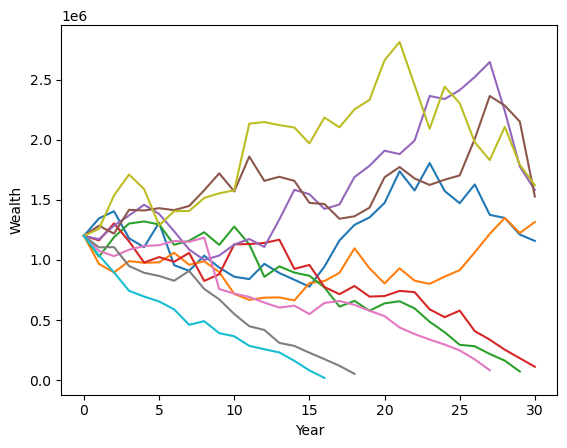

In [8]:
np.random.seed(123)
num_years = 30
num_sims = 10000
mean = 0.06
stdev = 0.12
spending_0 = 60000
spending_min_0 = 48000
W0 = 1200000
 
inflation = 0.02
 
ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
 
W = np.empty(shape=[num_sims, num_years+1])
W[:,:] = np.NaN
W[:,0] = W0
 
count_bankrupt = 0
 
for sim in range(num_sims):
    spending = spending_0
    spending_min = spending_min_0
    
    for year in range(1, num_years+1):
        next_period_wealth = (W[sim, year-1] - spending) * (1 + ret[sim,year])
        if next_period_wealth < 0:
            count_bankrupt += 1
            break
        else:
            W[sim, year] = next_period_wealth 
        spending = spending * (1 + inflation)
        spending_min = spending_min * (1 + inflation)
        if (spending < 0.04* W[sim, year]) or (spending > 0.06* W[sim, year]):
            spending = max(0.05 * W[sim, year], spending_min)
 
plt.xlabel('Year')
plt.ylabel('Wealth')
plt.plot(W[0:10,:].T);

Come previsto, i guardrail riducono significativamente la probabilità di rimanere senza soldi a circa il 28%:

In [9]:
print("The probability of bankruptcy is ", count_bankrupt/num_sims)

The probability of bankruptcy is  0.2804


Abbiamo adottato una strategia ingenua senza considerare fattori importanti come ad esempio una persona di 80 anni è più propensa a spendere rispetto ad una persona di 60 con una previsione di mercati al ribasso.

Abbiamo anche cosiderato l'inflazione fissa cosa che non è vera

## Rischio di inflazione

L'inflazione è stata un argomento caldo ultimamente. 

Gli effetti dell'inflazione potrebbero avere conseguenze serie su quanto a lungo dureranno i soldi di un pensionato, e il rischio di inflazione può essere facilmente incorporato nella simulazione Monte Carlo. 

Ma qual è il modo migliore per modellare il rischio di inflazione? 

I tassi di inflazione certamente non seguono un processo di rumore bianco come i rendimenti azionari, dove ogni anno è un’estrazione indipendente da una distribuzione normale. 

È più vicino a un cammino casuale, dove un’alta inflazione nel periodo precedente è spesso seguita da un’alta inflazione nel periodo successivo, ma differisce da un cammino casuale in quanto l’inflazione viene lentamente attratta verso una media di inflazione a lungo termine. 

Questo è noto come processo di **Ornstein-Uhlenbeck** o, in tempo discreto, un processo auto regressivo 1. 

Stimiamo i parametri di quel modello e poi lo implementiamo nella nostra simulazione Monte Carlo. 

La misura più comunemente usata dell'inflazione è l'Indice dei Prezzi al Consumo per Tutti i Consumatori Urbani, o CPI-U (ci sono molte altre misure, come il CPI-W, che l’Amministrazione della Sicurezza Sociale utilizza per gli aumenti del costo della vita, e l'indice dei prezzi delle spese per consumi personali (PCE), che è l’indicatore di inflazione preferito dalla Federal Reserve). 

Possiamo scaricare i dati sull'inflazione da FRED (Federal Reserve Economic Data). Abbiamo utilizzato FRED nel Capitolo 3 come nostra fonte per i dati sui tassi di interesse, ma FRED mantiene anche un database contenente numerose serie temporali economiche. 

Il simbolo per l'Indice dei Prezzi al Consumo per Tutti i Consumatori Urbani, Tutti gli Articoli (cioè, compresi cibo ed energia), Non Destagionalizzato è CPIAUCNS. 

Poi ricampioniamo l'indice mensile in un indice annuale e prendiamo le variazioni percentuali, risultando in una serie temporale storica anno su anno non sovrapposta dell’inflazione.

In [10]:
from dataloader import get_fed_data

start = '01-01-1947'
end = '01-03-2025'

data = get_fed_data("CPIAUCNS",start,end)
data = data.resample('Y').last() #2
yoy = data.pct_change().to_frame(name='yoy')

yoy.tail()

,yoy
2021-12-31,0.070364
2022-12-31,0.064544
2023-12-31,0.033521
2024-12-31,0.028881
2025-12-31,0.006546


In [11]:
yoy.min(),yoy.max()

(yoy   -0.020747
 dtype: float64,
 yoy    0.132939
 dtype: float64)

 Modelliamo l’inflazione come un processo mean reversion:
 
 $$
     inf_{t} - \mu = \phi \left( inf_{t-1} - \mu \right) + \epsilon_t
 $$
 
 con i seguenti termini:
 
 * $inf_{t}$ inflazione al tempo t
 * $\mu$ media dell'inflazione sul lungo periodo
 * $\phi$ tasso di mean reversion
 * $\epsilon_t$ rumore gaussiano
 
 eseguendo raccoglimenti arriviamo alla formula
 
 $$
     inf_{t} = \phi  inf_{(t-1)} + \mu (1 - \phi) + \epsilon_t
 $$

(0.6714380270851593, 0.011110738985486, 0.0004453659592089962)

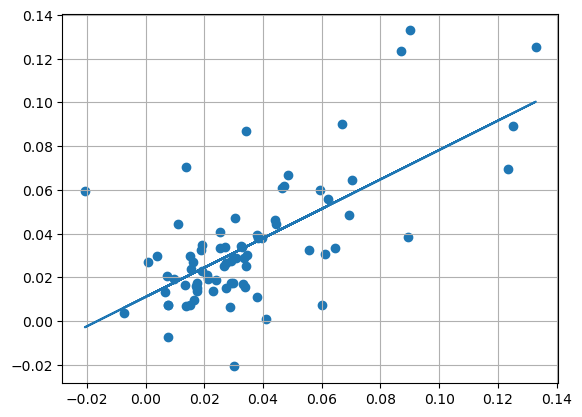

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

yoy['lag'] = yoy['yoy'].shift()
yoy.dropna(inplace=True)

X = yoy['lag'].values
y = yoy['yoy'].values

plt.scatter(X, y)
plt.grid(True)

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

phi = model.coef_[0][0]
c = model.intercept_[0]

y_pred = model.predict(X.reshape(-1, 1))
plt.plot(X,y_pred)

residual = y - y_pred
mse = mean_squared_error(y, y_pred)

phi,c,mse

In [13]:
print("The standard deviation of residuals is ", residual.std().round(4))

The standard deviation of residuals is  0.0341


In [14]:
sigma_inf = c / (1 - phi)
print("mu ",sigma_inf.round(4))

mu  0.0338


creiamo il nostro codice per simulare l'inflazione assumiamo che non ci sia una correlazione tra i rendimenti azionari e l'inflazione sebbene questo non è vero per le obbligazioni

In [15]:
np.random.seed(123)

num_years = 30
num_sims = 10000

inf0 = X[-1]

sigma_inf = 0.02124

z_inf = np.random.normal(loc=0, scale=1, size=(num_sims, num_years+1))

inflation = np.zeros(shape=(num_sims, num_years+1))
inflation[:,0] = inf0
for sim in range(num_sims):
    for year in range(1, num_years+1):
        inflation[sim, year] = (c + phi*inflation[sim, year-1] + sigma_inf*z_inf[sim, year])
 

In [16]:
np.random.seed(123)
num_years = 30
num_sims = 10000

mean = 0.06
stdev = 0.12

spending_0 = 60000
spending_min_0 = 48000

W0 = 1200000
inf0 = X[-1]


ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
z_inf = np.random.normal(loc=0, scale=1, size=(num_sims, num_years+1))
 
inflation = np.zeros(shape=(num_sims, num_years+1))
inflation[:,0] = inf0
for sim in range(num_sims):
    for year in range(1, num_years+1):
        inflation[sim, year] = (c + phi*inflation[sim, year-1] 
+ sigma_inf*z_inf[sim, year])
 
W = np.empty(shape=[num_sims, num_years+1])
W[:,:] = np.NaN
W[:,0] = W0
 
count_bankrupt = 0
 
for sim in range(num_sims):
    spending = spending_0
    spending_min = spending_min_0
 
    for year in range(1, num_years+1):
        next_period_wealth = (W[sim, year-1] - spending) * (1 + ret[sim,year])
        if next_period_wealth < 0:
            count_bankrupt += 1
            break
        else:
            W[sim, year] = next_period_wealth 
        spending = spending * (1 + inflation[sim, year])
        spending_min = spending_min * (1 + inflation[sim, year])
        if (spending < 0.04* W[sim, year]) or (spending > 0.06* W[sim, year]):
            spending = max(0.05 * W[sim, year], spending_min)

In [17]:
print("The probability of bankruptcy is ", count_bankrupt/num_sims)

The probability of bankruptcy is  0.4787


## Code lunghe

Esiste una vasta gamma di prove empiriche che dimostrano che i rendimenti di un periodo non seguono una distribuzione normale, ma presentano "code" molto più spesse di quanto ci si aspetterebbe con una distribuzione normale.

Questo è importante da considerare quando si proiettano le piccole probabilità di esaurimento del denaro. 

Una forte prova aneddotica che dimostra chiaramente la natura a coda lunga dei rendimenti azionari è il crollo del mercato azionario del 1987. 

Il 19 ottobre 1987, il mercato azionario è sceso di circa il 20% in un giorno, e con una deviazione standard giornaliera di circa l'1% al giorno, quel calo del mercato azionario rappresenta un movimento di 20 deviazioni standard. 
Se i rendimenti fossero veramente distribuiti normalmente, non ci si aspetterebbe di vedere un singolo evento come questo in 14 miliardi di anni, **l'età dell'universo!**

Un metodo comune per quantificare il grado di code lunghe è guardare la curtosi, o quarto momento standardizzato, dei rendimenti azionari. 

Se i rendimenti fossero indipendenti e seguissero una distribuzione normale, la curtosi in eccesso dovrebbe essere 0.

Mostriamo che i rendimenti giornalieri dell'S&P 500 hanno avuto una curtosi in eccesso di 19, che è fortemente diversa da 0 dal punto di vista statistico. 

Sebbene i rendimenti giornalieri e mensili mostrino una curtosi in eccesso, i rendimenti annuali non ne mostrano quasi nessuna, quindi i risultati in questa sezione saranno più rilevanti quando si simulano i rendimenti mensili.


In [18]:
from scipy.stats import kurtosis

ret = pd.read_csv('./data/data.csv',index_col=0)
SP500 = ret['Sp500']
SP500 = SP500.dropna()
print('The excess kurtosis is: ', kurtosis(SP500))

The excess kurtosis is:  17.426897334232454


Una distribuzione che può essere utilizzata al posto di una distribuzione normale è la Distribuzione di Errore Generalizzata (GED), talvolta chiamata Distribuzione Normale Generalizzata. 

Oltre a un parametro di posizione e di scala (simile alla media e alla deviazione standard per una distribuzione normale), la distribuzione GED ha un parametro aggiuntivo per la curtosi, β. 

La distribuzione normale è un caso speciale della distribuzione GED quando β = 2, ma quando 0 < β < 2, la distribuzione ha code più spesse rispetto a una normale.

Per incorporare la distribuzione GED nelle nostre simulazioni Monte Carlo, dobbiamo solo modificare una linea di codice che genera i numeri casuali per la simulazione.

Utilizziamo il metodo `gennorm.rvs` nel modulo `scipy.stats` per generare i numeri casuali GED. 

C'è una complicazione aggiuntiva che deve essere affrontata. 
Con il generatore di distribuzione normale, l'argomento di scala è semplicemente la volatilità. 

Tuttavia, con il generatore GED, il parametro di scala deve essere regolato per la curtosi. 

Ad esempio, un numero casuale GED con un parametro di scala di uno non avrebbe una deviazione standard di uno - dipende dal parametro beta. In particolare, la scala dovrebbe essere.

$$
    \sigma \sqrt{\frac{\Gamma \left( 1 / \beta \right)}{\Gamma \left( 3 / \beta \right)}}
$$

dove Γ(⋅) è la funzione Gamma in matematica, che può essere calcolata in Python usando `math.gamma()`. 

Nel listato qui sotto, generiamo variabili casuali GED con β = 1 e calcoliamo la deviazione standard per verificare che la deviazione standard corrisponda alla deviazione standard desiderata del 12%. 

Mostriamo anche il codice originale normale che genera rendimenti normali, commentato per confronto.



In [19]:
from scipy.stats import gennorm
import math
 
beta = 1.0

scale = stdev * (math.gamma(1/beta)/math.gamma(3/beta))**0.5
 
# Generate GED random returns
#ret = np.random.normal(loc=mean, scale=stdev, size=(numb_sims, numb_years+1))
ret = gennorm.rvs(beta, loc=mean, scale=scale, size=(num_sims, num_years+1))
print('The standard deviation is ', ret.std())

The standard deviation is  0.1197781795687979


## Simulazione Storica e Bootstrapping

Un altro approccio alla simulazione Monte Carlo è utilizzare i rendimenti storici piuttosto che generare rendimenti casuali da una distribuzione normale. 

Ci sono alcuni vantaggi in questo approccio:

* Le proprietà delle serie temporali dei rendimenti possono essere catturate, piuttosto che assumere che i rendimenti siano indipendenti di anno in anno come in una simulazione Monte Carlo. Empiricamente, c'è stata una leggera autocorrelazione negativa dei rendimenti annuali delle azioni - un anno negativo nel mercato è stato leggermente più probabile che fosse seguito da un anno positivo, e viceversa. La piccola correlazione seriale negativa può essere catturata con le simulazioni storiche.


* Le distribuzioni non normali dei rendimenti, come le code grosse e la asimmetria, possono essere catturate con le simulazioni storiche. Le simulazioni Monte Carlo assumono che le correlazioni tra gli asset siano costanti nel tempo, il che non è sempre il caso. Ad esempio, ci sono alcune evidenze che durante le crisi di mercato, le correlazioni tendono ad aumentare, il che può essere catturato con una simulazione storica.

Alcuni studi hanno esaminato periodi storici specifici, come il periodo iniziato nel 1973 come scenario "peggiore" poiché include un mercato orso all'inizio e un'alta inflazione.

Sebbene l'approccio della simulazione storica sia facile da implementare in Python, trarre conclusioni basate su un piccolo numero di anni sovrapposti di dati può essere fuorviante. Ad esempio, negli ultimi 50 anni, ci sono stati tre anni in cui il mercato è sceso di oltre il 20% in un anno, ma in tutti e tre i casi, il mercato è rimbalzato di oltre il 20% nell'anno successivo. Una simulazione storica assegnerebbe una probabilità zero di avere due anni consecutivi di grandi mercati in ribasso, mentre una simulazione Monte Carlo considererebbe questa possibilità nel futuro.

Un approccio alternativo è il bootstrapping, dove i rendimenti vengono generati mediante campionamento casuale con sostituzione dei rendimenti storici. I rendimenti simulati avranno la stessa distribuzione non normale dei rendimenti e le correlazioni tra gli asset saranno mantenute. Tuttavia, mescolando i rendimenti storici, le proprietà delle serie temporali dei rendimenti come la correlazione seriale non saranno preservate.

Il bootstrapping è facile da implementare in Python usando la funzione `numpy.random.choice(a, size=None, replace=True)`, che può essere utilizzata per generare campioni casuali da una serie di rendimenti storici. 

Nel listato qui sotto, generiamo prima una serie di rendimenti annuali del mercato azionario (questo può essere esteso a più classi di asset). Poi, mostriamo la riga di codice che sostituisce il codice originale utilizzato per generare rendimenti normali.


In [20]:
# Generate bootstrapped returns
#ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
ret = np.random.choice(SP500, size=(num_sims, num_years+1))

Tecnicamente, un indice di rendimento totale che include i dividendi sarebbe meglio da usare per i rendimenti storici. 

L'indice di rendimento totale su Yahoo Finance risale al 1988, ma ci sono altre fonti con storie più lunghe, come il sito web di Robert Shiller (http://www.econ.yale.edu/~shiller/), che possono essere scaricate.


## Rischio di Longevità
Finora, abbiamo esaminato la probabilità che un pensionato esaurisca i soldi in un periodo di tempo fisso, che nei nostri esempi è stato di 30 anni. 

Una stima più realistica considererebbe la probabilità che un pensionato viva più a lungo della sua aspettativa di vita. Questo è noto come rischio di longevità. 

Il rischio di longevità è una considerazione in una serie di altre decisioni di pianificazione finanziaria.

Possiamo usare le tavole di mortalità per stimare la probabilità di morire entro un anno. 

Una tavola di mortalità comunemente usata e pubblicamente disponibile è stata prodotta dalla Society of Actuaries (SOA). Nel 2014, hanno rilasciato la tavola di mortalità RP-2014, che può essere scaricata da https://www.soa.org/resources/experience-studies/2014/research-2014-rp/.

Secondo la SOA, i dati di mortalità che hanno utilizzato sono stati raccolti da piani pensionistici privati a prestazioni definite, e quindi è necessario fare una precisazione. 

C'è un potenziale problema di selezione avversa nell'utilizzo dei dati dei piani pensionistici. 

Molti piani pensionistici offrono ai loro lavoratori la scelta tra un pagamento in un'unica soluzione e una rendita, e i lavoratori che scelgono una rendita hanno maggiori probabilità di avere una maggiore aspettativa di vita. Infatti, i loro tassi di mortalità, che non includono i lavoratori che hanno scelto l'opzione del pagamento in un'unica soluzione, sono inferiori rispetto a tavole simili riportate dalla Sicurezza Sociale.

Nel listato, assumiamo che tu abbia scaricato il file Excel sulla mortalità dal link del sito web della SOA sopra indicato e che tu abbia posizionato il file nella stessa directory del tuo codice Python. Utilizziamo la funzione pandas `read_excel()` per leggere il file Excel in un DataFrame. 

Utilizzeremo la colonna per "Healthy Annuitant" (c'è anche una colonna sui dati di mortalità per i pensionati con disabilità), e assumeremo arbitrariamente che il nostro pensionato sia maschio. La Figura mostra le prime cinque righe della tavola di mortalità.



In [23]:
file_name = 'data/research-2014-rp-mort-tab-rates-exposure.xlsx'
sheet = 'White Collar'
gender = 'Males'
if gender == 'Males':
    usecols = 'B,E'
elif gender == 'Females':
    usecols = 'B,I'
mort = pd.read_excel(file_name, sheet, header=3, usecols=usecols).set_index('Age')
mort.dropna(inplace=True)
mort.head()

,Healthy Annuitant
Age,
50,0.002764
51,0.002981
52,0.003202
53,0.003429
54,0.003661


Nel listato qui sotto, abbiamo modificato la nostra simulazione originale per incorporare la tavola di mortalità che abbiamo appena scaricato. 

**Sostituiamo il ciclo for che originariamente durava 30 anni con un ciclo while che termina alla morte o alla bancarotta.** 


Per ogni anno in ogni simulazione, consultiamo la probabilità di mortalità per quell'età. 

Supponiamo che la probabilità di mortalità sia, ad esempio, del 2%. 
In tal caso, generiamo un numero casuale uniforme tra zero e uno, e se è inferiore a 0.02, assumiamo che il pensionato muoia alla fine dell'anno. 

Per calcolare la mortalità, dobbiamo introdurre una nuova variabile, che è l'età iniziale del pensionato. 

Invece di contare il numero di bancarotte come abbiamo fatto negli altri esempi, in questa simulazione, teniamo traccia dell'età in cui un pensionato esaurisce i soldi se li esaurisce. Un istogramma di queste età è mostrato nella Figura sotto.


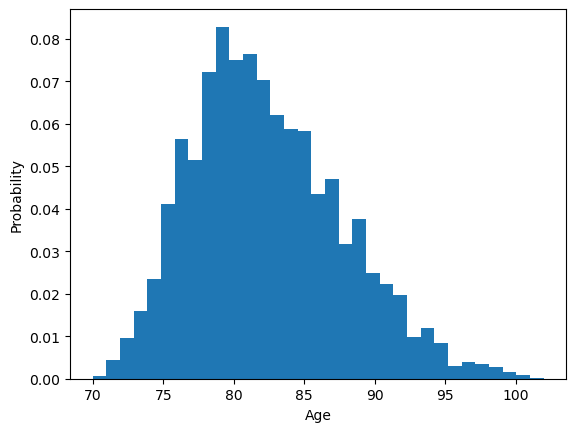

In [26]:
np.random.seed(123)
num_years = 50
num_sims = 10000
mean = 0.06
stdev = 0.12
spending_0 = 60000
W0 = 1200000
age_start = 60
 
inflation = 0.02
 
# Generate normal random returns
ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
 
# Initialize Wealth
W = np.empty(shape=[num_sims, num_years+1])
W[:,:] = np.NaN
W[:,0] = W0
 
# Keep track of age if bankrupt
age_bankruptcy = []
 
for sim in range(num_sims):
    spending = spending_0
    year = 0
    alive = True
    bankrupt = False
    while not bankrupt and alive:
        # Check whether you run out of money
        if W[sim, year] - spending < 0:
            age_bankruptcy.append(year+age_start)
            bankrupt = True
        else:
            # Check whether you live to the next year
            mortality_prob = mort['Healthy Annuitant'].loc[year+age_start]
            p = np.random.uniform()
            if p < mortality_prob:
                alive = False
            else:
                year += 1
                W[sim,year] = (W[sim, year-1] - spending) * (1 + ret[sim, year])
            spending = spending * (1 + inflation)
    
bins = max(age_bankruptcy) - min(age_bankruptcy) + 1
plt.xlabel('Age')
plt.ylabel('Probability')
plt.hist(age_bankruptcy, bins=bins, density=True);

Come prima, possiamo calcolare la probabilità di esaurire i soldi con il rischio di longevità per un sessantenne.

In [27]:
print('The prob of running out of money is ',len(age_bankruptcy)/num_sims)

The prob of running out of money is  0.3686


## Flessibilità delle Simulazioni Monte Carlo

Le simulazioni Monte Carlo sono estremamente flessibili e possono gestire una vasta gamma di situazioni e problemi. 

Gli esempi che abbiamo fornito in questo capitolo sono solo la punta dell'iceberg delle capacità di Monte Carlo e non sono affatto un elenco completo delle cose che si possono fare con una simulazione. 

E abbiamo tagliato molti angoli per rendere gli esempi più semplici e leggibili. 

Considera l'uso di una simulazione per trovare l'età ottimale per eleggere la Sicurezza Sociale. 

Vorremmo includere le coppie invece degli individui perché i benefici coniugali e di sopravvivenza sono influenzati dalle decisioni congiunte di una coppia. 

Dovremmo anche considerare le tasse poiché i benefici della Sicurezza Sociale hanno regole fiscali speciali. 

E potremmo includere redditi esterni perché la Sicurezza Sociale ha un test del reddito che può ridurre i benefici.

Un calcolatore accurato della Sicurezza Sociale eseguirebbe tutti i calcoli su base mensile piuttosto che annuale. 

E la nostra funzione obiettivo dovrebbe essere modificata. Piuttosto che minimizzare la probabilità di esaurire i soldi, potremmo voler usare funzioni di utilità e massimizzare l'utilità attesa, che terrebbe conto dell'avversione al rischio. Non ho visto l'avversione al rischio trattata in questo modo in nessuno dei calcolatori di Sicurezza Sociale gratuiti o basati su abbonamento, quindi ci sono chiaramente aree che sono mature per miglioramenti. E siamo sicuri che puoi pensare a molte altre funzionalità da aggiungere. Quindi considera questo capitolo come un punto di partenza per simulazioni più complicate.
